# House Prices: Advanced Regression Techniques

### Import Required Libraries

In [1]:
# Reading / Writing Files & Encoding
import pandas as pd
import numpy as np

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Sampling
from imblearn.over_sampling import SMOTE

# Ensembles & Functions
from vecstack import stacking
from sklearn.svm import LinearSVC as svc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Miscellaneous
import matplotlib.pyplot as plt
from collections import Counter #for Smote, 
import warnings
warnings.filterwarnings("ignore")

### Load in Data, Create Dataframes and Perform Basic Cleaning & Operations

In [46]:
# Dropping columns with less than ~85% of data available (more than ~15% listed as N/A)
train_df = pd.read_csv("data/project_data/train.csv").dropna(axis=1,thresh=1200)
test_df = pd.read_csv("data/project_data/test.csv").dropna(axis=1,thresh=1200)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

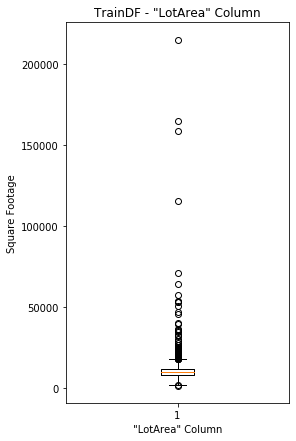

In [47]:
fig1, ax1 = plt.subplots(figsize=(4,7))
ax1.set_title('TrainDF - "LotArea" Column')
ax1.set_xlabel('"LotArea" Column')
ax1.set_ylabel('Square Footage')
ax1.boxplot(train_df['LotArea'])
plt.show()

Normal scaling convetion would recommend using the MinMaxScaler() function within sklearn. However, due to the excess number of outliers within practically ALL continuous parameters, I've decided to apply RobustScaler() instead. This tends to perform better when there are a large number of outliers. Documentation can be found here (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).